In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df2 = pd.read_parquet('classification_parquet')
df2.to_csv('dataset0.csv')

In [4]:
df2.head()

,num_of_prev_attempts,studied_credits,date_registration,sum_click,date_assessment,weight,score,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,0,240,-159,98,19,10,7,0,0,1
1,0,240,-159,98,54,20,8,0,0,1
2,0,240,-159,98,117,20,7,0,0,1
3,0,240,-159,98,166,20,8,0,0,1
4,0,240,-159,98,215,30,8,0,0,1


In [5]:
targets = []
targets=[str(i) for i in range(10)]

In [6]:
num_cols = ['num_of_prev_attempts','score']
for i in num_cols:
    df2[i] = df2[i].astype('int8')

In [7]:
y = df2['score']
df2.drop(['score'],axis = 1,inplace=True)
X = df2

In [8]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.metrics import classification_report

In [11]:
import numpy as np

In [12]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

In [13]:
#training the model
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [14]:
#getting the test data results
predictions = classifier.predict(X_test)


In [15]:
#using a classification report to measure the metrics
print(classification_report(y_test,predictions,target_names = targets ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4847
           1       0.00      0.00      0.00      7959
           2       0.00      0.00      0.00     14585
           3       0.08      0.01      0.01     31095
           4       0.28      0.00      0.00     50963
           5       0.19      0.02      0.03    107742
           6       0.24      0.01      0.02    171261
           7       0.26      0.32      0.28    285374
           8       0.29      0.62      0.40    304588
           9       0.38      0.32      0.35    258701

    accuracy                           0.30   1237115
   macro avg       0.17      0.13      0.11   1237115
weighted avg       0.27      0.30      0.24   1237115



In [16]:
from sklearn.metrics import confusion_matrix
conf_mat_rf = confusion_matrix(predictions,y_test)

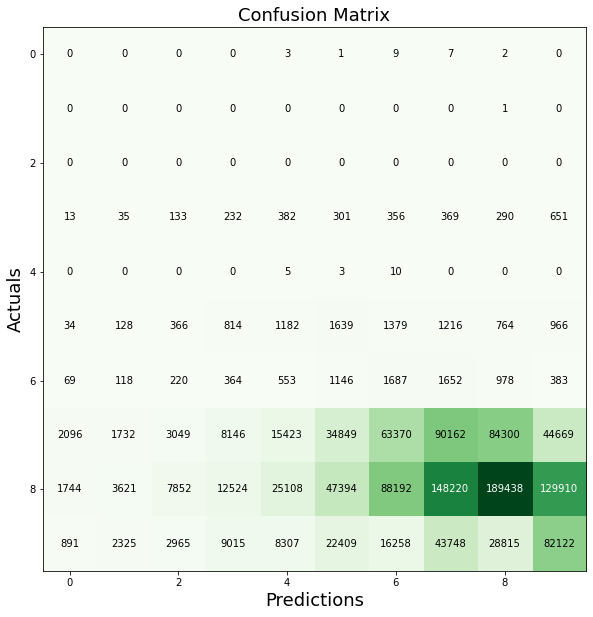

In [17]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=conf_mat_rf, figsize=(10,10), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [18]:
y_prob = classifier.predict_proba(X_test)

In [19]:
from sklearn.metrics import log_loss
log_loss(y_test,y_prob)

2.2939607929435946